<a href="https://colab.research.google.com/github/RioSUni/Uni/blob/main/AI_portfolio_1_4_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [284]:
tensorflow.random.set_seed(1)
#to get reproducible results

In [285]:
url = 'https://raw.githubusercontent.com/westurner/house_prices/develop/house_prices/data/train.csv'

In [286]:
df_housedata = pd.read_csv(url)

In [287]:
df_housedata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [288]:
df_housedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [289]:
df_housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [290]:
del df_housedata['PoolQC']
del df_housedata['Alley']
del df_housedata['FireplaceQu']
del df_housedata['Fence']
del df_housedata['MiscFeature']

In [291]:
df_housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [292]:
categorical_columns = df_housedata.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [293]:
categorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
      'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

df = pd.get_dummies(df_housedata, columns = categorical_cols) 

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 272 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(234)
memory usage: 767.2 KB


In [295]:
array = df.values
normalized_array = tf.keras.utils.normalize(array)
df = pd.DataFrame(normalized_array, columns=df.columns)

In [296]:
columns = list(df.columns)
columns.remove('SalePrice')
columns = ['SalePrice'] + columns

df = df.reindex(columns=columns)

The above code takes the SalePrice and puts it to the first index as one hot encoding has moved the position of the saleprice column from the last column to the 37th. This will allow for easier partitioning of the dataset into features and target numpy arrays to feed into the model

In [297]:
df

,SalePrice,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.998927,0.000005,0.000287,0.000311,0.040484,0.000034,0.000024,0.009596,0.009596,0.000939,...,0.0,0.0,0.0,0.000005,0.000000,0.0,0.0,0.0,0.000005,0.0
1,0.998274,0.000011,0.000110,0.000440,0.052801,0.000033,0.000044,0.010868,0.010868,0.000000,...,0.0,0.0,0.0,0.000006,0.000000,0.0,0.0,0.0,0.000006,0.0
2,0.998511,0.000013,0.000268,0.000304,0.050261,0.000031,0.000022,0.008940,0.008944,0.000724,...,0.0,0.0,0.0,0.000004,0.000000,0.0,0.0,0.0,0.000004,0.0
3,0.997139,0.000028,0.000499,0.000427,0.068019,0.000050,0.000036,0.013639,0.014031,0.000000,...,0.0,0.0,0.0,0.000007,0.000007,0.0,0.0,0.0,0.000000,0.0
4,0.998169,0.000020,0.000240,0.000335,0.056936,0.000032,0.000020,0.007985,0.007985,0.001397,...,0.0,0.0,0.0,0.000004,0.000000,0.0,0.0,0.0,0.000004,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.998583,0.008308,0.000342,0.000354,0.045176,0.000034,0.000029,0.011407,0.011412,0.000000,...,0.0,0.0,0.0,0.000006,0.000000,0.0,0.0,0.0,0.000006,0.0
1456,0.997696,0.006922,0.000095,0.000404,0.062594,0.000029,0.000029,0.009397,0.009445,0.000565,...,0.0,0.0,0.0,0.000005,0.000000,0.0,0.0,0.0,0.000005,0.0
1457,0.999183,0.005466,0.000262,0.000247,0.033901,0.000026,0.000034,0.007277,0.007521,0.000000,...,0.0,0.0,0.0,0.000004,0.000000,0.0,0.0,0.0,0.000004,0.0
1458,0.997118,0.010236,0.000140,0.000477,0.068172,0.000035,0.000042,0.013681,0.014004,0.000000,...,0.0,0.0,0.0,0.000007,0.000000,0.0,0.0,0.0,0.000007,0.0


In [298]:
df.isnull().any()

SalePrice                True
Id                       True
MSSubClass               True
LotFrontage              True
LotArea                  True
                         ... 
SaleCondition_AdjLand    True
SaleCondition_Alloca     True
SaleCondition_Family     True
SaleCondition_Normal     True
SaleCondition_Partial    True
Length: 272, dtype: bool

In [299]:
df = df.dropna()

In [300]:
df.isnull().any()

SalePrice                False
Id                       False
MSSubClass               False
LotFrontage              False
LotArea                  False
                         ...  
SaleCondition_AdjLand    False
SaleCondition_Alloca     False
SaleCondition_Family     False
SaleCondition_Normal     False
SaleCondition_Partial    False
Length: 272, dtype: bool

In [301]:
df

,SalePrice,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.998927,0.000005,0.000287,0.000311,0.040484,0.000034,0.000024,0.009596,0.009596,0.000939,...,0.0,0.0,0.0,0.000005,0.000000,0.0,0.0,0.0,0.000005,0.0
1,0.998274,0.000011,0.000110,0.000440,0.052801,0.000033,0.000044,0.010868,0.010868,0.000000,...,0.0,0.0,0.0,0.000006,0.000000,0.0,0.0,0.0,0.000006,0.0
2,0.998511,0.000013,0.000268,0.000304,0.050261,0.000031,0.000022,0.008940,0.008944,0.000724,...,0.0,0.0,0.0,0.000004,0.000000,0.0,0.0,0.0,0.000004,0.0
3,0.997139,0.000028,0.000499,0.000427,0.068019,0.000050,0.000036,0.013639,0.014031,0.000000,...,0.0,0.0,0.0,0.000007,0.000007,0.0,0.0,0.0,0.000000,0.0
4,0.998169,0.000020,0.000240,0.000335,0.056936,0.000032,0.000020,0.007985,0.007985,0.001397,...,0.0,0.0,0.0,0.000004,0.000000,0.0,0.0,0.0,0.000004,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.998583,0.008308,0.000342,0.000354,0.045176,0.000034,0.000029,0.011407,0.011412,0.000000,...,0.0,0.0,0.0,0.000006,0.000000,0.0,0.0,0.0,0.000006,0.0
1456,0.997696,0.006922,0.000095,0.000404,0.062594,0.000029,0.000029,0.009397,0.009445,0.000565,...,0.0,0.0,0.0,0.000005,0.000000,0.0,0.0,0.0,0.000005,0.0
1457,0.999183,0.005466,0.000262,0.000247,0.033901,0.000026,0.000034,0.007277,0.007521,0.000000,...,0.0,0.0,0.0,0.000004,0.000000,0.0,0.0,0.0,0.000004,0.0
1458,0.997118,0.010236,0.000140,0.000477,0.068172,0.000035,0.000042,0.013681,0.014004,0.000000,...,0.0,0.0,0.0,0.000007,0.000000,0.0,0.0,0.0,0.000007,0.0


In [302]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]

In [303]:
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000005,0.000287,0.000311,0.040484,0.000034,0.000024,0.009596,0.009596,0.000939,0.003382,...,0.0,0.0,0.0,0.000005,0.000000,0.0,0.0,0.0,0.000005,0.0
1,0.000011,0.000110,0.000440,0.052801,0.000033,0.000044,0.010868,0.010868,0.000000,0.005379,...,0.0,0.0,0.0,0.000006,0.000000,0.0,0.0,0.0,0.000006,0.0
2,0.000013,0.000268,0.000304,0.050261,0.000031,0.000022,0.008940,0.008944,0.000724,0.002171,...,0.0,0.0,0.0,0.000004,0.000000,0.0,0.0,0.0,0.000004,0.0
3,0.000028,0.000499,0.000427,0.068019,0.000050,0.000036,0.013639,0.014031,0.000000,0.001538,...,0.0,0.0,0.0,0.000007,0.000007,0.0,0.0,0.0,0.000000,0.0
4,0.000020,0.000240,0.000335,0.056936,0.000032,0.000020,0.007985,0.007985,0.001397,0.002615,...,0.0,0.0,0.0,0.000004,0.000000,0.0,0.0,0.0,0.000004,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.008308,0.000342,0.000354,0.045176,0.000034,0.000029,0.011407,0.011412,0.000000,0.000000,...,0.0,0.0,0.0,0.000006,0.000000,0.0,0.0,0.0,0.000006,0.0
1456,0.006922,0.000095,0.000404,0.062594,0.000029,0.000029,0.009397,0.009445,0.000565,0.003753,...,0.0,0.0,0.0,0.000005,0.000000,0.0,0.0,0.0,0.000005,0.0
1457,0.005466,0.000262,0.000247,0.033901,0.000026,0.000034,0.007277,0.007521,0.000000,0.001031,...,0.0,0.0,0.0,0.000004,0.000000,0.0,0.0,0.0,0.000004,0.0
1458,0.010236,0.000140,0.000477,0.068172,0.000035,0.000042,0.013681,0.014004,0.000000,0.000344,...,0.0,0.0,0.0,0.000007,0.000000,0.0,0.0,0.0,0.000007,0.0


In [304]:
y

0       0.998927
1       0.998274
2       0.998511
3       0.997139
4       0.998169
          ...   
1455    0.998583
1456    0.997696
1457    0.999183
1458    0.997118
1459    0.997193
Name: SalePrice, Length: 1121, dtype: float64

In [305]:
X = X.values
y = y.values

In [306]:
X

array([[4.79101574e-06, 2.87460944e-04, 3.11416023e-04, ...,
        0.00000000e+00, 4.79101574e-06, 0.00000000e+00],
       [1.10002624e-05, 1.10002624e-04, 4.40010495e-04, ...,
        0.00000000e+00, 5.50013119e-06, 0.00000000e+00],
       [1.34028345e-05, 2.68056689e-04, 3.03797581e-04, ...,
        0.00000000e+00, 4.46761149e-06, 0.00000000e+00],
       ...,
       [5.46644949e-03, 2.62449564e-04, 2.47452446e-04, ...,
        0.00000000e+00, 3.74927948e-06, 0.00000000e+00],
       [1.02360259e-02, 1.40315640e-04, 4.77073175e-04, ...,
        0.00000000e+00, 7.01578199e-06, 0.00000000e+00],
       [9.87052317e-03, 1.35212646e-04, 5.07047423e-04, ...,
        0.00000000e+00, 6.76063231e-06, 0.00000000e+00]])

In [307]:
y

array([0.99892678, 0.99827381, 0.99851117, ..., 0.99918298, 0.99711802,
       0.99719327])

In [308]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(271,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics='mean_absolute_percentage_error')

In [309]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
28/28 [==============================] - 1s 9ms/step - loss: 0.9570 - mean_absolute_percentage_error: 95.9719 - val_loss: 0.9077 - val_mean_absolute_percentage_error: 91.0190
Epoch 2/10
28/28 [==============================] - 0s 4ms/step - loss: 0.8488 - mean_absolute_percentage_error: 85.1149 - val_loss: 0.7764 - val_mean_absolute_percentage_error: 77.8520
Epoch 3/10
28/28 [==============================] - 0s 4ms/step - loss: 0.6887 - mean_absolute_percentage_error: 69.0621 - val_loss: 0.5810 - val_mean_absolute_percentage_error: 58.2494
Epoch 4/10
28/28 [==============================] - 0s 4ms/step - loss: 0.4542 - mean_absolute_percentage_error: 45.5361 - val_loss: 0.3005 - val_mean_absolute_percentage_error: 30.1202
Epoch 5/10
28/28 [==============================] - 0s 4ms/step - loss: 0.1394 - mean_absolute_percentage_error: 13.9777 - val_loss: 0.0424 - val_mean_absolute_percentage_error: 4.2630
Epoch 6/10
28/28 [==============================] - 0s 4ms/step - loss:

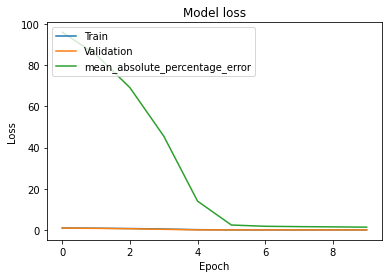

In [310]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['mean_absolute_percentage_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'mean_absolute_percentage_error'], loc='upper left')
plt.show()

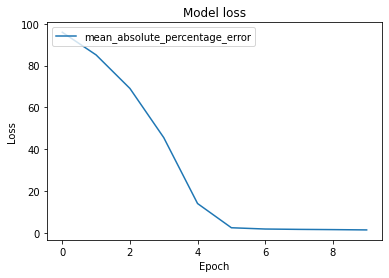

In [311]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['mean_absolute_percentage_error'], loc='upper left')
plt.show()

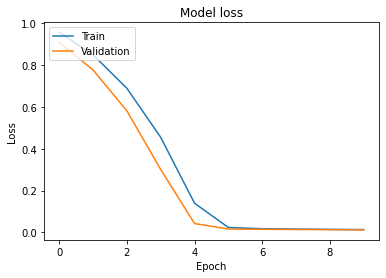

In [312]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [313]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(271,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics='mean_absolute_percentage_error')

Added more hidden layers with more units. This will increase the complexity of the model. To counter-act overfitting I added dropout between the layers. I also increased the epochs from 100, this will allow the model to learn for longer. Also I increased the batchsize to speed up training.

In [314]:
history = model.fit(X, y, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 30ms/step - loss: 0.9845 - mean_absolute_percentage_error: 98.7267 - val_loss: 0.9692 - val_mean_absolute_percentage_error: 97.1804
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.9533 - mean_absolute_percentage_error: 95.6014 - val_loss: 0.9313 - val_mean_absolute_percentage_error: 93.3838
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.9125 - mean_absolute_percentage_error: 91.5064 - val_loss: 0.8841 - val_mean_absolute_percentage_error: 88.6475
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.8626 - mean_absolute_percentage_error: 86.4989 - val_loss: 0.8277 - val_mean_absolute_percentage_error: 82.9991
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.8033 - mean_absolute_percentage_error: 80.5510 - val_loss: 0.7619 - val_mean_absolute_percentage_error: 76.3996
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss:

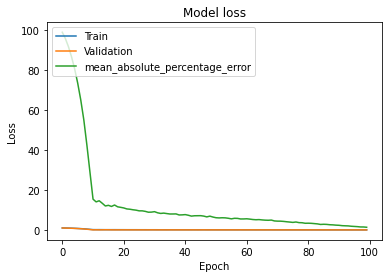

In [315]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['mean_absolute_percentage_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'mean_absolute_percentage_error'], loc='upper left')
plt.show()

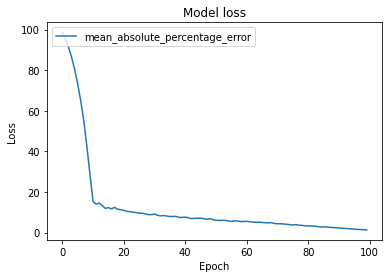

In [316]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['mean_absolute_percentage_error'], loc='upper left')
plt.show()

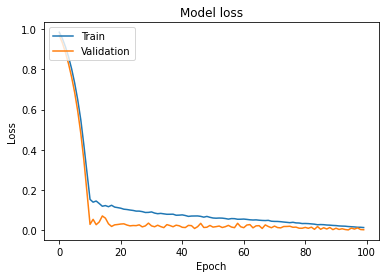

In [317]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

First Model MAPE: 1.2127


Second Model MAPE: 0.2406